In [2]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pickle
import matplotlib.pyplot as plt

In [3]:
DATA_PATH = 'C:\\Users\\배진우\\Documents\\multiCampus_TA\\python_data'

# mnist 데이터를 다운로드하고 나중에 사용하기 위해 저장해 둔다.
# 시간이 오래 걸리기 때문.
mnist = fetch_openml('mnist_784')
with open(DATA_PATH + 'mnist.pkl', 'wb') as f:
       pickle.dump(mnist, f)

In [9]:
# -*- coding: utf-8 -*-

# 저장된 mnist 데이터를 읽어온다.
with open(DATA_PATH + 'mnist.pkl', 'rb') as f:
        mnist = pickle.load(f)

In [12]:
print(type(mnist['data']))
      
mnist.keys()

<class 'pandas.core.frame.DataFrame'>


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [7]:
# 데이터가 많아 시간이 오래걸리므로, 앞 부분 10000개만 분석한다.
x_feat = np.array(mnist['data'][:10000])
y_target = np.array(mnist['target'][:10000])

In [13]:
x_feat[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [16]:
y_target[0]

'5'


class = 5


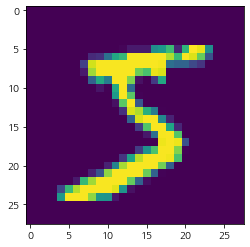

In [8]:
# n-번째 손글씨 이미지를 확인해 본다.
n = 0
img = x_feat[n].reshape(28,28)
print('\nclass =', y_target[n])
plt.imshow(img)
plt.show()

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x_feat, y_target, test_size=0.2)

model = LogisticRegression(max_iter=100, tol=0.0001, penalty='l2', C=1.0)

model.fit(x_train, y_train)

print("* 학습용 데이터로 측정한 정확도 = %.2f" % model.score(x_train, y_train))
print("* 시험용 데이터로 측정한 정확도 = %.2f" % model.score(x_test, y_test))

y_train_predict = model.predict(x_train) 

y_test_predict = model.predict(x_test) 

* 학습용 데이터로 측정한 정확도 = 0.99
* 시험용 데이터로 측정한 정확도 = 0.88


C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
y_test_predict

array(['9', '2', '9', ..., '2', '4', '4'], dtype=object)

In [57]:
y_test

array(['9', '2', '9', ..., '2', '4', '4'], dtype=object)

In [58]:
mask = (y_test_predict == y_test)

In [59]:
false_idx_ls = np.where(np.array(mask)==False)
false_idx_ls

(array([   5,   23,   36,   47,   65,   66,   81,   98,   99,  100,  108,
         110,  127,  129,  132,  134,  137,  153,  164,  176,  179,  180,
         182,  187,  194,  210,  211,  235,  269,  273,  274,  277,  283,
         301,  310,  312,  331,  336,  347,  350,  359,  363,  369,  376,
         384,  402,  414,  418,  421,  428,  435,  447,  448,  454,  457,
         458,  473,  481,  483,  484,  501,  506,  512,  533,  535,  541,
         544,  552,  553,  561,  563,  565,  566,  572,  576,  592,  602,
         607,  608,  631,  633,  638,  652,  657,  659,  661,  663,  679,
         706,  715,  720,  750,  757,  769,  773,  782,  784,  792,  794,
         799,  800,  805,  817,  845,  883,  884,  889,  892,  893,  894,
         902,  911,  912,  916,  918,  964,  981, 1003, 1010, 1019, 1040,
        1056, 1063, 1068, 1070, 1075, 1076, 1091, 1094, 1099, 1103, 1114,
        1120, 1138, 1139, 1144, 1146, 1156, 1162, 1164, 1165, 1169, 1170,
        1174, 1179, 1194, 1211, 1212, 

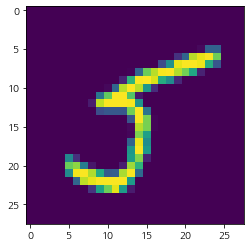

모델 예측 값= 1

실제 값 = 5


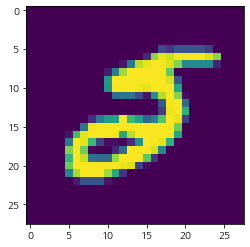

모델 예측 값= 2

실제 값 = 5


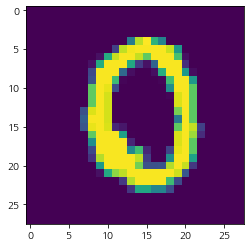

모델 예측 값= 6

실제 값 = 0


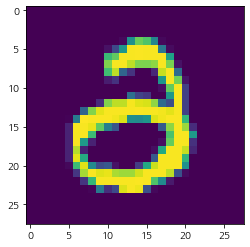

모델 예측 값= 3

실제 값 = 2


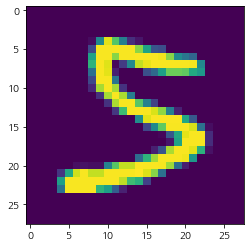

모델 예측 값= 3

실제 값 = 5


In [62]:

for idx in false_idx_ls[0][:5] :
    img = x_test[idx].reshape(28,28)
    plt.imshow(img)
    plt.show()
    print("모델 예측 값=", y_test_predict[idx])
    print('\n실제 값 =', y_test[idx])
    print("=======" *5)

C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu


최적 파라메터 = {'C': 0.1}
시험 데이터 정확도 = 0.8740


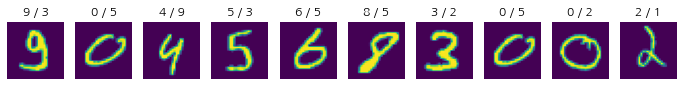

In [72]:

params = [{'C': [0.1, 0.5, 1.0]}]
model = LogisticRegression(penalty='l2', max_iter=500)
grid = GridSearchCV(estimator=model, param_grid=params, cv=5, refit=True)
grid.fit(x_train, y_train)

# 최적 모델로 시험 데이터의 성능을 평가한다.
best_model = grid.best_estimator_

print("\n최적 파라메터 =", grid.best_params_)
print("시험 데이터 정확도 = {:.4f}".format(best_model.score(x_test, y_test)))

# 잘못 분류한 이미지 몇개를 확인해 본다.
# 어떤 이미지를 잘 맞추지 못할까? 사람이라면 아래 이미지를 잘 맞출 수 있을까?
y_pred = best_model.predict(x_test)

n_sample = 10
miss_cls = np.where(y_test != y_pred)[0]
miss_sam = np.random.choice(miss_cls, n_sample)

fig, ax = plt.subplots(1, n_sample, figsize=(12,4))
for i, miss in enumerate(miss_sam):
    x = x_test[miss] * 255  # 표준화 단계에서 255로 나누었으므로, 여기서는 곱해준다.
    x = x.reshape(28, 28)   # 이미지 확인을 위해 (28 x 28) 형태로 변환한다.
    ax[i].imshow(x)
    ax[i].axis('off')
    ax[i].set_title(str(y_test[miss]) + ' / ' + str(y_pred[miss]))
